# Avocado Price Prediction

### Project Description:
* The aim of this project is to predict the prices of avocado which is a kind of fruit. The change in the prices is given in the dataset according to the date and other features. We have to analyse the dataset and find out the factors or trends which are affecting the prices of Avocado.
* The dataset includes the following features:

●	**'Date'**		: Dates on the sale of Avocado

●	**'AveragePrice'** : The prices of Avocado

●	**'Total Volume'**	: The total number of volume sold

●	**'4046'**		: Total number of avocados with PLU 4046 sold

●	**'4225'**		: Total number of avocados with PLU 4225 sold

●	**'4770'**		: Total number of avocados with PLU 4770 sold

●	**'Total Bags'**	: Continuous feature

●	**'Small Bags'**	: Continuous feature

●	**'Large Bags'**	: Continuous feature

●	**'XLarge Bags'**	: Continuous feature

●	**'Type'**		: Type of avocado (Conventional or Organic)

●	**'Year'**		: Year of avocado when they sold.

●	**'Region'**	: Region in which Avocado is sold.


<img src = "avacado.jpg" style= "width: 300px;height:200px"/>

### Dataset link :- https://www.kaggle.com/datasets/neuromusic/avocado-prices

### Importing the Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

###  Import Dataset

In [2]:
data = pd.read_csv('data.csv',index_col=0)
data.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


### Data Exploration

In [3]:
# Check Shape of dataset
data.shape

(18249, 13)

18249 rows and 13 columns present in dataset.

In [4]:
# get basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [5]:
#columns of dataset
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [6]:
# check statistical summary of dataset
data.describe(include = 'all')

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249
unique,169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54
top,2016-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,GreatLakes
freq,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338
mean,NaN,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN
std,NaN,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN
min,NaN,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN
75%,NaN,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN


In [7]:
# check is there any missing value present in dataset
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values present in dataset

In [8]:
# check unique values 
data.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

## Exploratory Data Analysis

### Data visualization

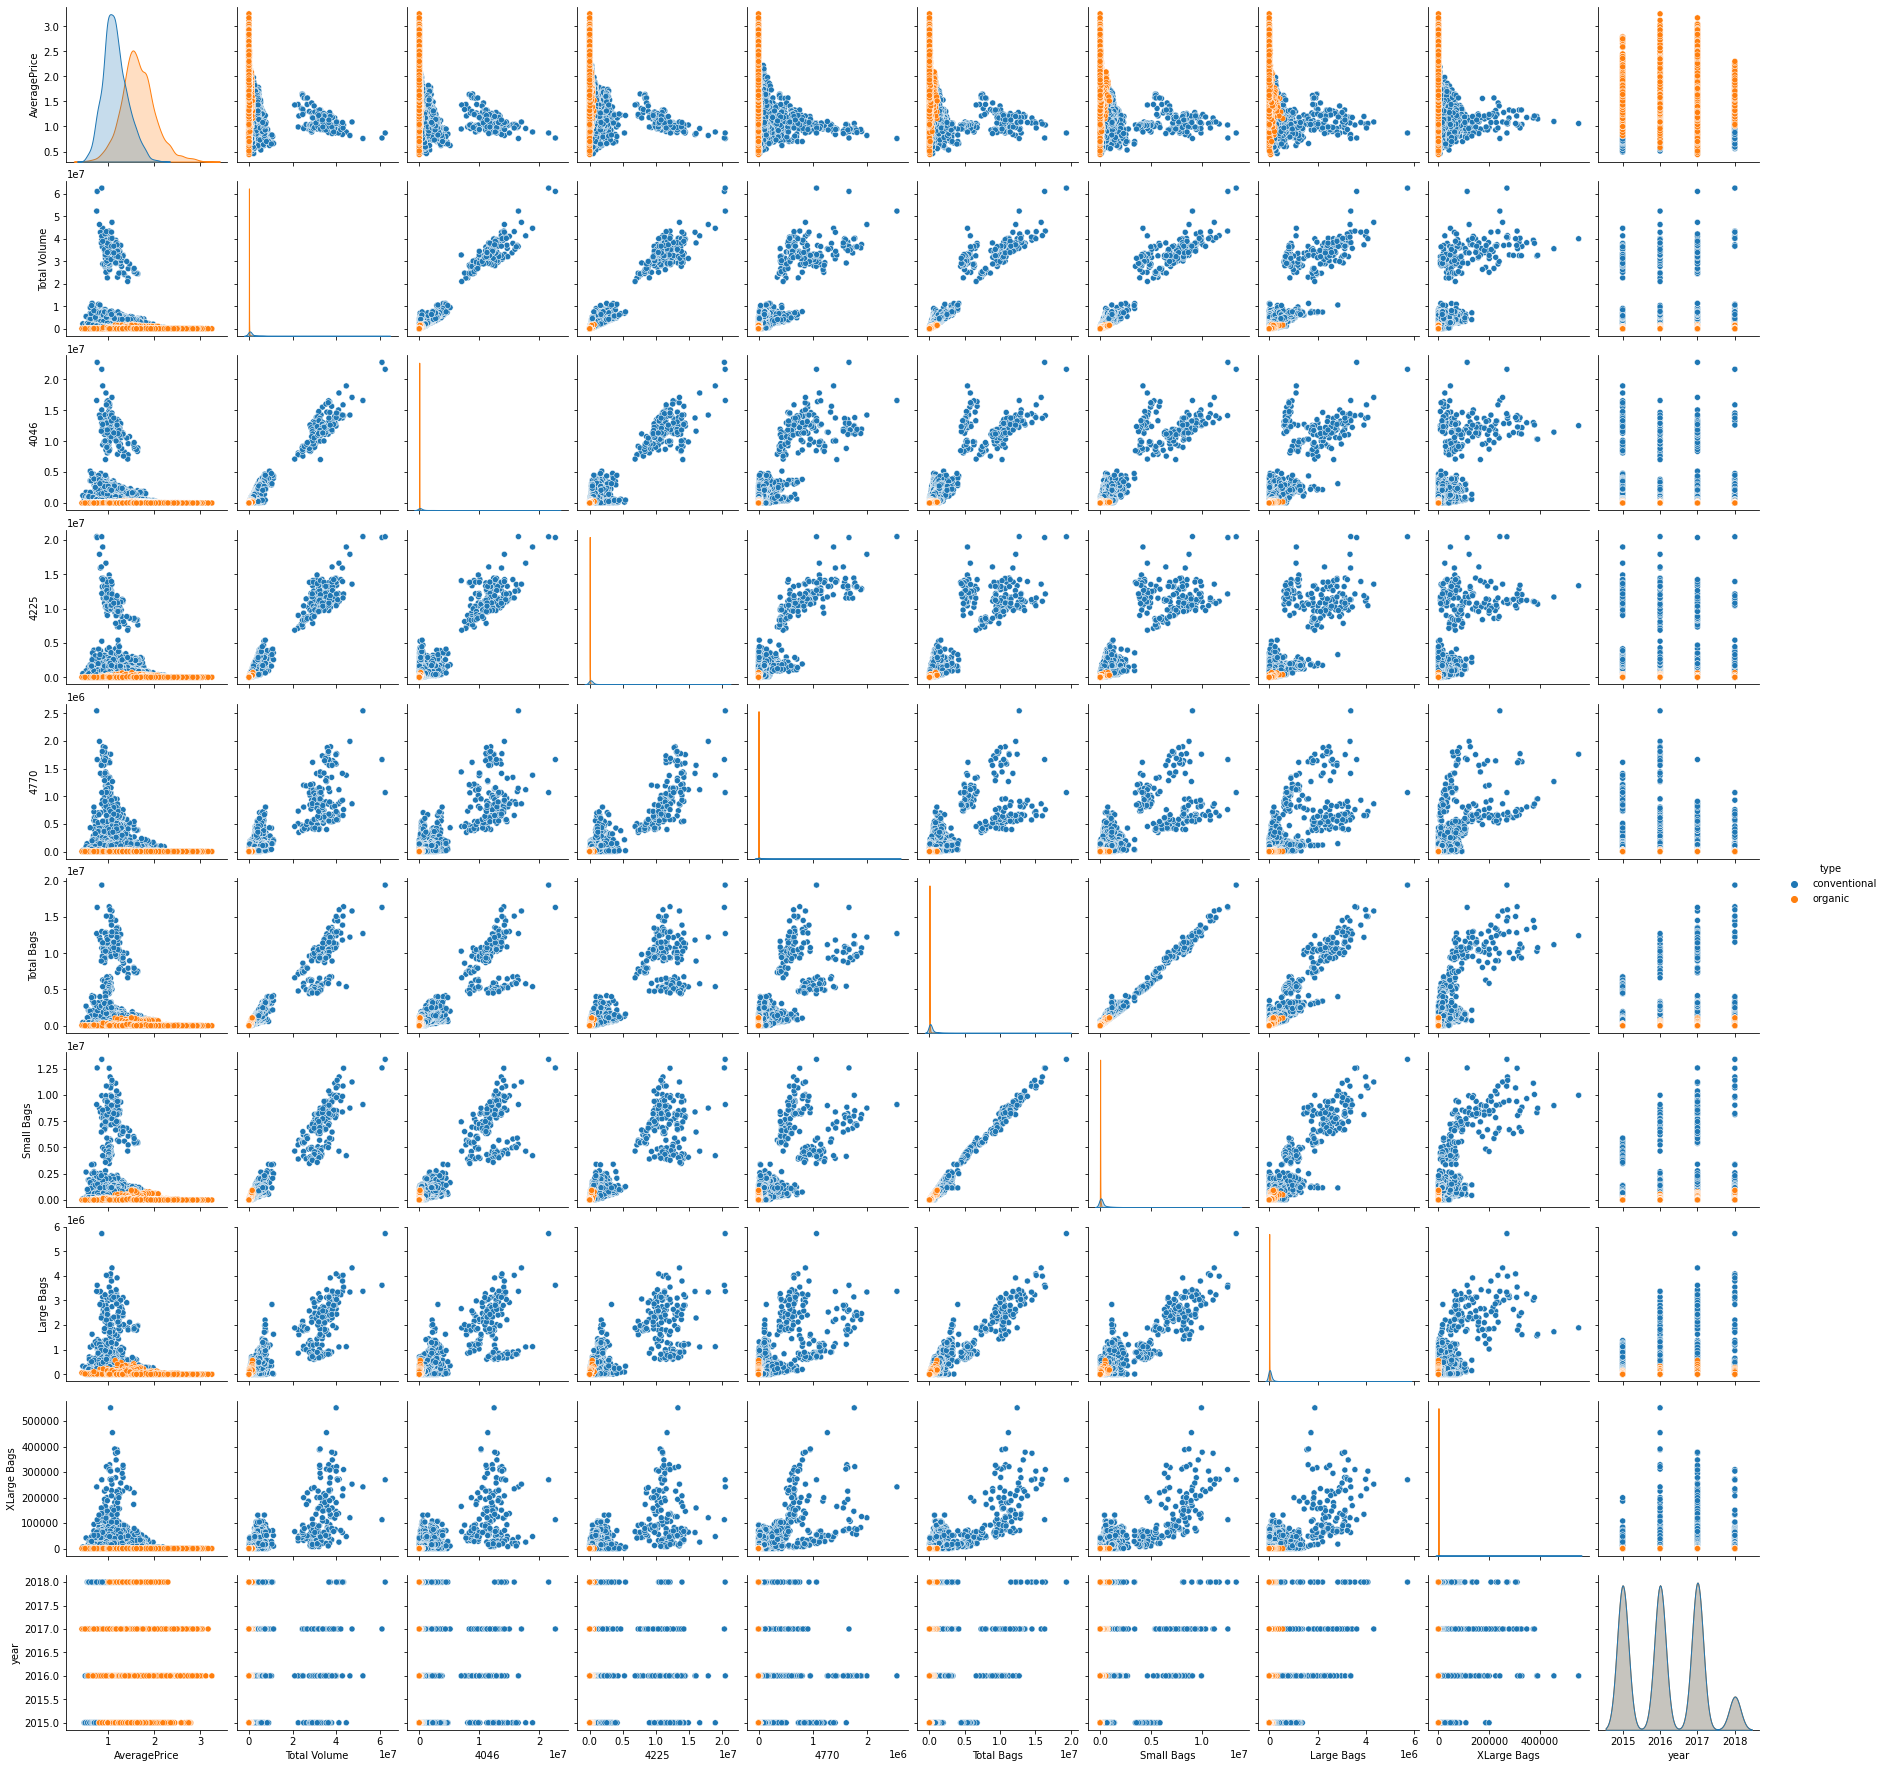

In [9]:
sns.pairplot(data, hue= "type")
plt.show()

C:\Users\PaVaN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


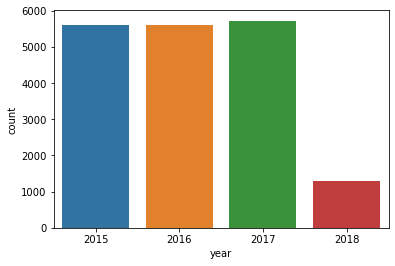

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [10]:
sns.countplot(data.year)
plt.show()
data.year.value_counts()

In [11]:
# Average Price
data.AveragePrice.unique()

array([1.33, 1.35, 0.93, 1.08, 1.28, 1.26, 0.99, 0.98, 1.02, 1.07, 1.12,
       1.31, 1.11, 1.34, 1.45, 1.05, 1.37, 1.27, 1.32, 1.23, 1.19, 1.43,
       1.2 , 1.22, 1.13, 1.16, 1.06, 1.17, 1.24, 0.96, 1.  , 1.09, 0.95,
       0.97, 1.15, 1.01, 1.14, 1.1 , 1.04, 1.03, 1.18, 1.29, 1.25, 0.71,
       0.94, 0.91, 1.39, 1.4 , 1.36, 1.3 , 1.54, 1.59, 1.56, 1.38, 1.49,
       1.5 , 1.47, 1.42, 1.41, 1.44, 1.52, 0.9 , 0.87, 0.78, 0.92, 0.83,
       0.88, 0.84, 0.85, 1.21, 0.79, 0.89, 0.86, 0.8 , 0.82, 0.74, 0.81,
       0.77, 0.75, 0.65, 0.73, 0.68, 0.72, 0.67, 0.76, 0.62, 0.7 , 0.66,
       1.46, 0.49, 0.53, 0.56, 0.6 , 0.58, 0.54, 0.52, 0.51, 0.57, 0.63,
       0.64, 0.61, 1.48, 1.55, 1.58, 1.53, 1.57, 1.51, 0.69, 1.62, 1.63,
       1.61, 1.6 , 1.73, 1.8 , 1.86, 1.85, 1.69, 1.66, 1.65, 1.64, 1.67,
       1.68, 1.82, 2.07, 1.84, 1.83, 1.7 , 1.72, 1.81, 1.78, 0.59, 1.9 ,
       1.93, 1.99, 1.95, 1.89, 1.76, 1.71, 1.74, 0.55, 1.79, 1.75, 1.94,
       2.2 , 1.87, 1.77, 2.06, 2.11, 2.22, 2.14, 2.

In [12]:
data.AveragePrice.value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64

C:\Users\PaVaN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


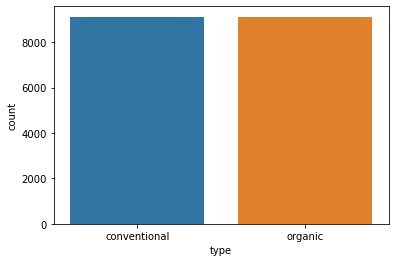

conventional    9126
organic         9123
Name: type, dtype: int64

In [13]:
sns.countplot(data.type)
plt.show()
data.type.value_counts()

C:\Users\PaVaN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


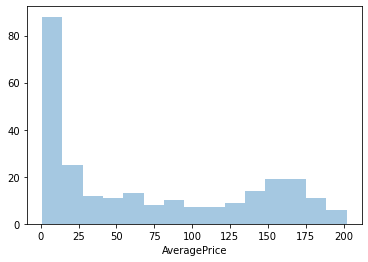

In [14]:
sns.distplot(data.AveragePrice.value_counts(), bins= 15, kde= False)
plt.show()

In [15]:
print("Mean Average Price: ", data['AveragePrice'].mean())

print("Minimun Average Price: ", data['AveragePrice'].min())

print("Maximum Average Price: ", data['AveragePrice'].max())

Mean Average Price:  1.4059784097758825
Minimun Average Price:  0.44
Maximum Average Price:  3.25


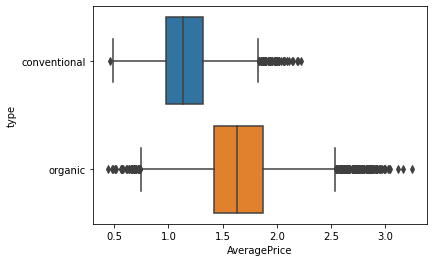

In [16]:
sns.boxplot(y="type", x="AveragePrice", data=data)
plt.show()

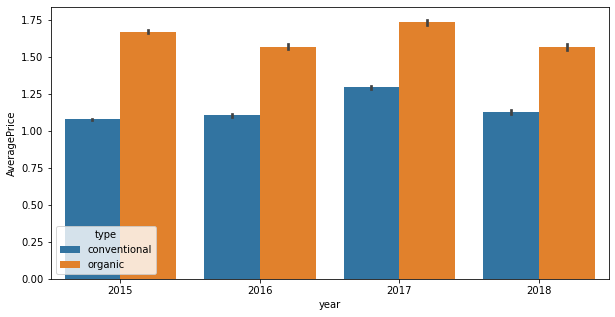

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x='year',y='AveragePrice', hue= "type",  data=data)
plt.show()

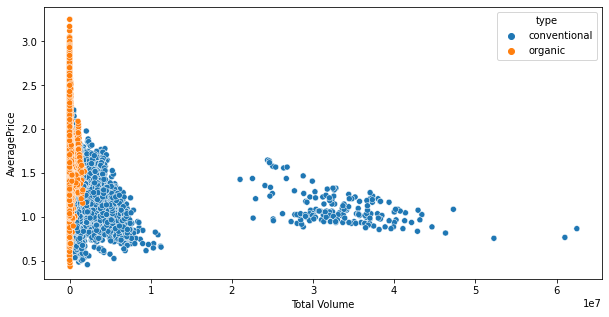

In [18]:
plt.figure(figsize= (10,5))
sns.scatterplot(x="Total Volume", y= "AveragePrice", hue= "type", data = data)
plt.show()

C:\Users\PaVaN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


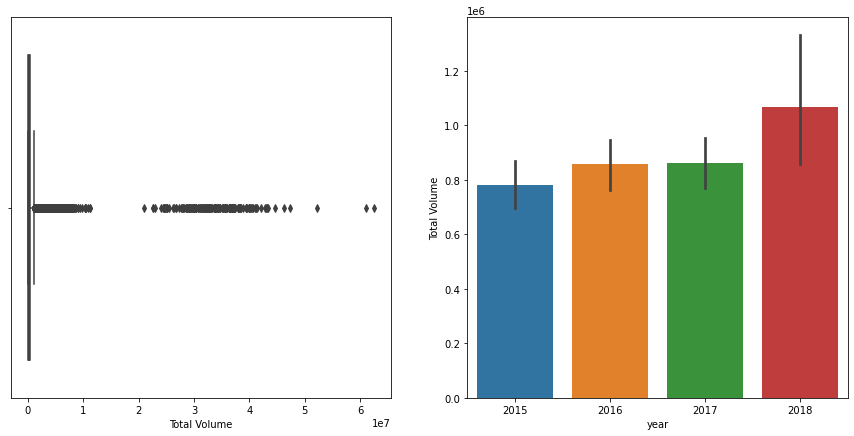

Mean Total Volume:  850644.0130089332
Minimun Total Volume:  84.56
Maximum Total Volume:  62505646.52


In [19]:
plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(data['Total Volume'])

plt.subplot(1,2,2)
sns.barplot(x='year',y='Total Volume',data=data)
plt.show()

print("Mean Total Volume: ", data['Total Volume'].mean())

print("Minimun Total Volume: ", data['Total Volume'].min())

print("Maximum Total Volume: ", data['Total Volume'].max())

<Figure size 1080x720 with 0 Axes>

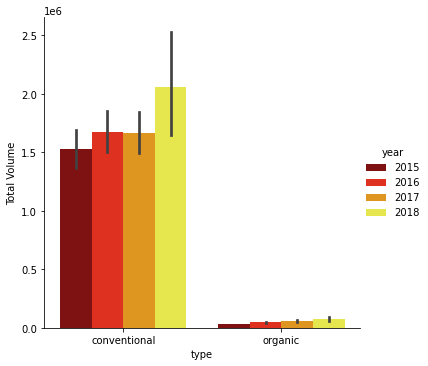

In [20]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=data, palette="hot")
plt.show()

C:\Users\PaVaN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


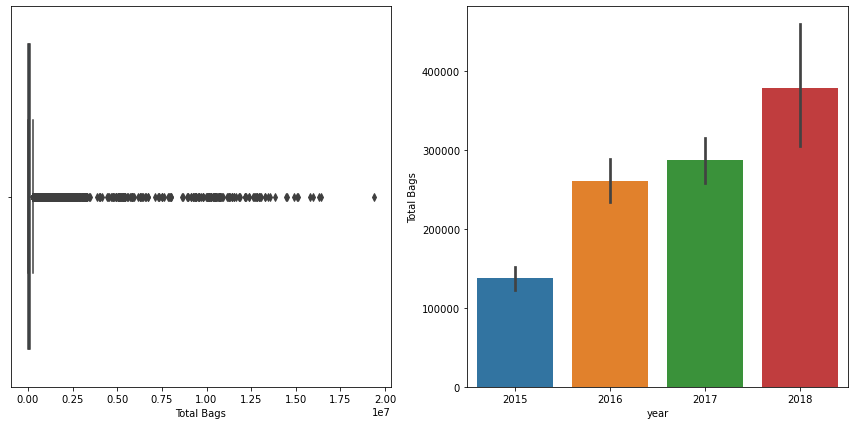

Mean Total Bags:  239639.20205983953
Minimun Total Bags:  0.0
Maximum Total Bags:  19373134.37


In [21]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data['Total Bags'])

plt.subplot(1,2,2)
sns.barplot(x='year',y='Total Bags',data=data)
plt.show()

print("Mean Total Bags: ", data['Total Bags'].mean())

print("Minimun Total Bags: ", data['Total Bags'].min())

print("Maximum Total Bags: ", data['Total Bags'].max())

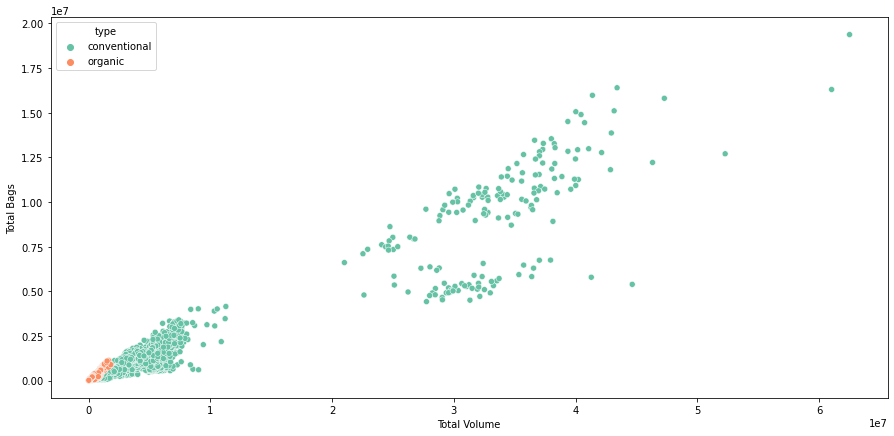

In [22]:
plt.figure(figsize= (15,7))
sns.scatterplot(x="Total Volume", y= "Total Bags", hue= "type", data = data, palette="Set2")
plt.show()

From this plot, it can be concluded that if the total avocado sold for both types increases, then the total bags also increases.

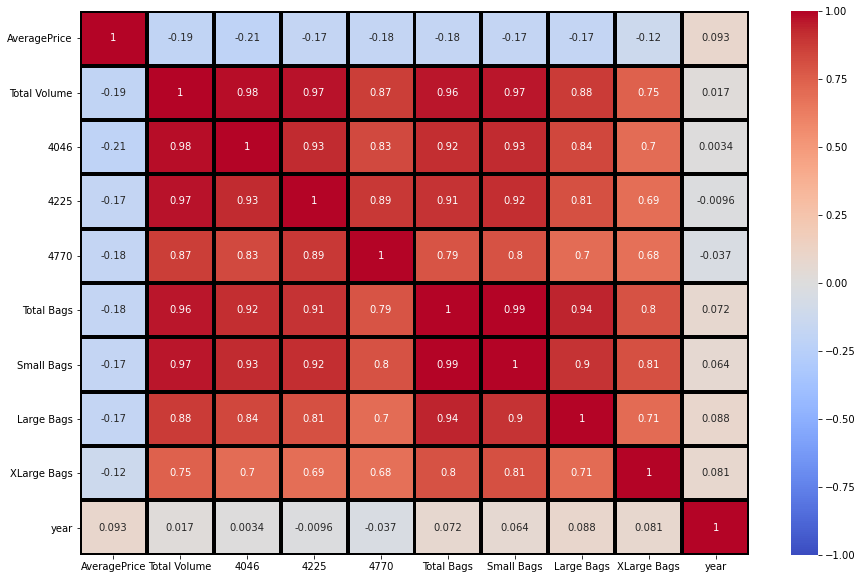

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.show()

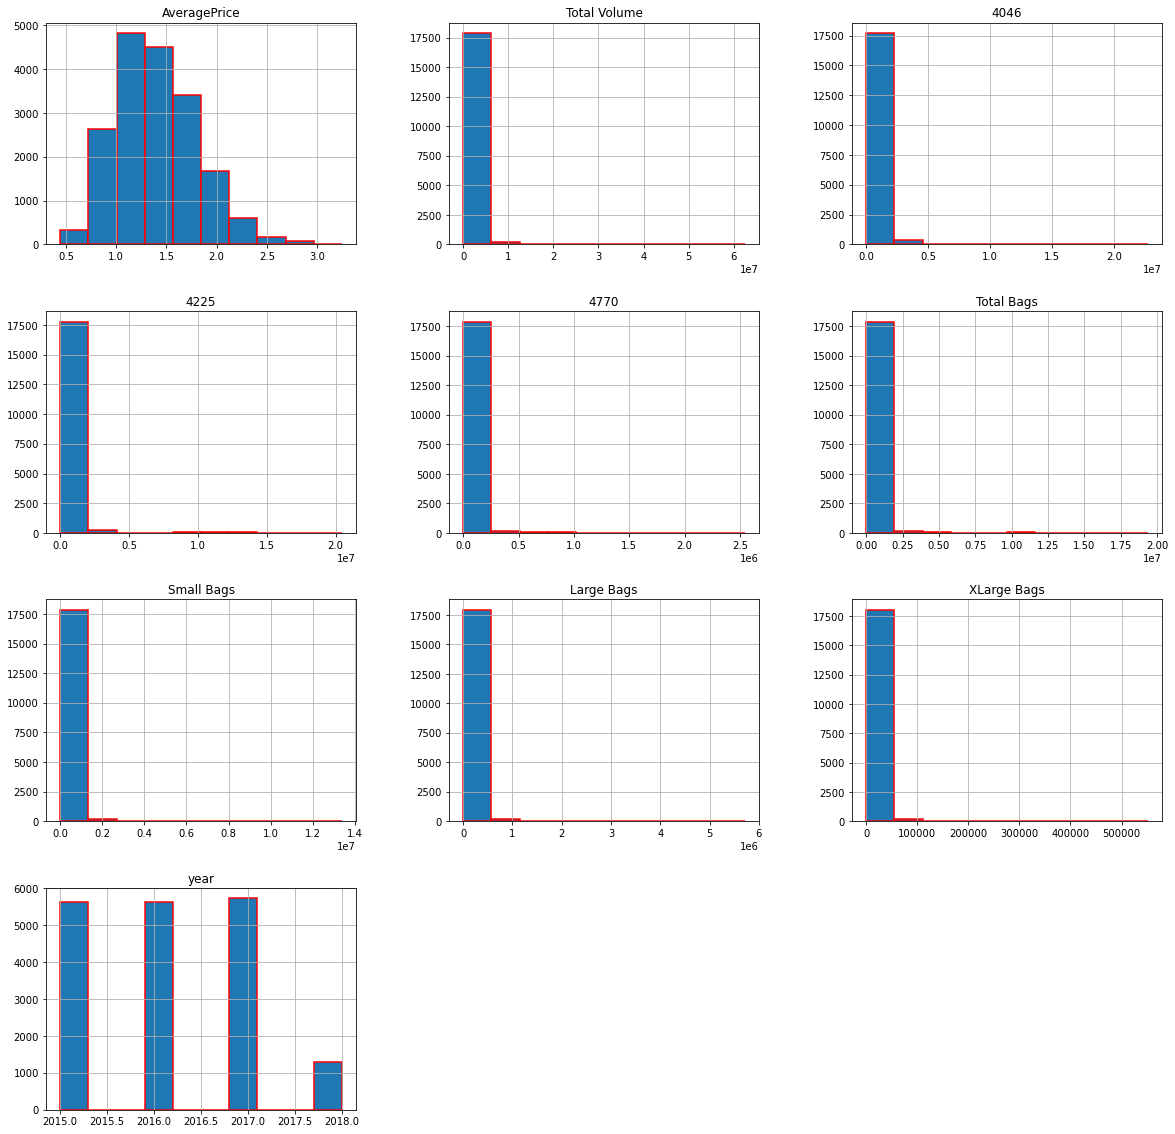

In [24]:
data.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))
plt.show()

<ipython-input-25-f802c8bf1a6c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['Date'] = pd.DatetimeIndex(date_df['Date'])
<ipython-input-25-f802c8bf1a6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_df['Date'] = date_df['Date'].apply(lambda x: x.strftime('%Y-%m'))


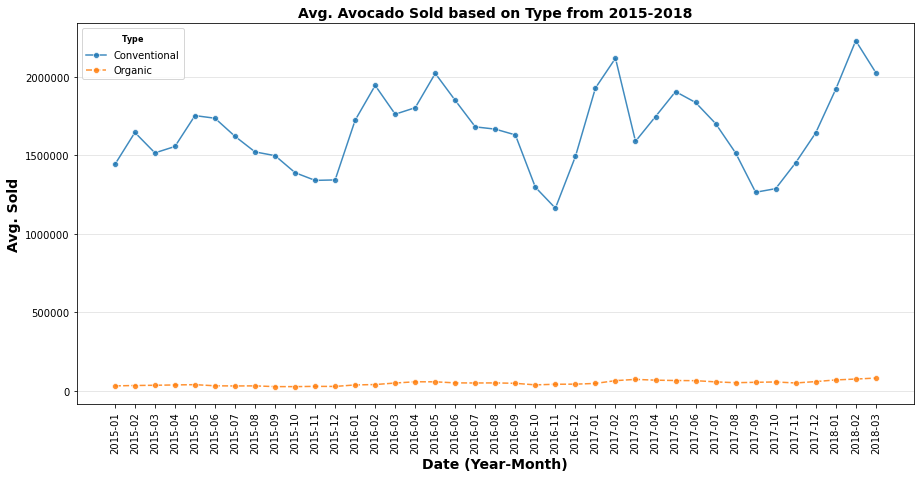

In [25]:
# --- Calculating Mean of `Total Volume` grouped by Type and Date ---
date_df = data[['Date', 'Total Volume', 'type']]
date_df['Date'] = pd.DatetimeIndex(date_df['Date'])
date_df['Date'] = date_df['Date'].apply(lambda x: x.strftime('%Y-%m'))
group = date_df.groupby(['Date', 'type'])
month_avg = group.aggregate({'Total Volume':np.mean})

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize=(15,7))
plt.title('Avg. Avocado Sold based on Type from 2015-2018',fontweight='bold', fontsize='14')

sns.lineplot(data=month_avg, x='Date', y='Total Volume', hue='type', style='type', markers=['o', 'o'], alpha=0.85)


plt.xlabel('Date (Year-Month)', fontweight='bold', fontsize='14', fontfamily='sans-serif')
plt.ylabel('Avg. Sold', fontweight='bold', fontsize='14', fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation='90', fontsize='10')
plt.yticks(rotation='0', fontsize='10')
plt.grid(axis='y', alpha=0.5, lw=0.6)
plt.grid(axis='x', alpha=0)
plt.legend(labels=['Conventional','Organic'], title='$\\bf{Type}$', fontsize='10', 
           title_fontsize='8', frameon=True);

### Data Cleaning

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.5+ MB


Now we have to convert Date to DateTime formate

In [27]:
data.Date = data.Date.apply(pd.to_datetime)

In [28]:
# Extracting Month only and dropping Date Column
data['Month']=data['Date'].apply(lambda x:x.month)
data.drop('Date',axis=1,inplace=True)

In [29]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [30]:
# mapping months into interger type
data.Month = data.Month.map({1:'JAN',2:'FEB',3:'MARCH',4:'APRIL',5:'MAY',6:'JUNE',7:'JULY',8:'AUG',9:'SEPT',10:'OCT',11:'NOV',12:'DEC'})

In [31]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,DEC
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,DEC
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,DEC
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,DEC
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,NOV


**Check month wise distribution of sales**

C:\Users\PaVaN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


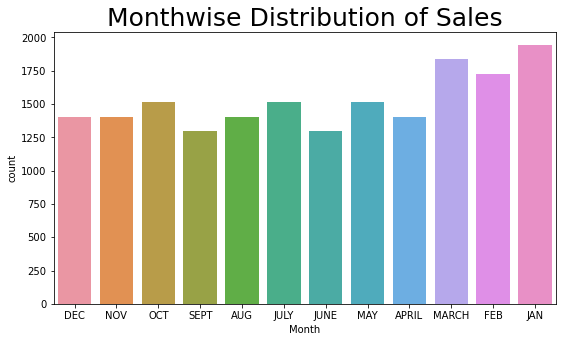

In [32]:
plt.figure(figsize=(9,5))
sns.countplot(data['Month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25})
plt.show()

Here we can see in the month of Jan , Feb and March sales of Avacado is high.

#### Label Encoding

In [33]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
 
data['type']= label_encoder.fit_transform(data['type'])
data['type'].unique()

array([0, 1])

In [34]:
# Conventional type has been converted into 0 and Organic has been converted into 1.
data['type'].value_counts()

0    9126
1    9123
Name: type, dtype: int64

Here we converted Conventional type has been converted into 0 and Organic has been converted into 1.

**Creating dummy variables and concating them into dataframe**

In [35]:
dummies = pd.get_dummies(data[['year','region','Month']],drop_first=True)

In [36]:
#Shape of dummies
dummies.shape

(18249, 65)

In [37]:
df_dummies = pd.concat([data[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type']],dummies],axis=1)

In [38]:
# Total dataset shape
df_dummies.shape

(18249, 74)

In [39]:
target = data['AveragePrice']

### Splitting and Feature Scaling

In [40]:
# Splitting data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummies,target,test_size=0.30)

# Columns need to be scaled
cols_to_std = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train[cols_to_std])
X_train[cols_to_std] = scaler.transform(X_train[cols_to_std])
X_test[cols_to_std] = scaler.transform(X_test[cols_to_std])

### Building different ML models for evaluating purpose to find out the best performing one. 

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'K-nearest Neighbors' : KNeighborsRegressor(n_neighbors=1)
}

results=pd.DataFrame(columns=['MAE','MSE','R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]

### Evaluating different models using Evaluation metrics

In [ ]:
results

In [ ]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Oranges',subset=['R2-score'])

Here we can clearely see **Random Forest Regressor** has better perform than other regressor.

### Model Created Successfully !
### Thank You !!